# eXtreme GRADIENT BOOSTING - XGBoost

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [3]:
!pip install xgboost

In [4]:
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [7]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        d:\btkakademi_turkcellgy\.tgy_veribilimi\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method:

In [8]:
# reg_lambda ( l2 ), reg_alpha ( L1 ) : Düzenlileştirme için kullanılan cezalar

In [9]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [10]:
# MODEL TUNNING
# HATIRLATMA
# Bu işlemlerin daha etkili bir şekilde gözlenmesi ancak ilgili algoritmaların kendi karmaşık yapılarını daha büyük verisetlerinde daha iyi ortaya çıkarmasıyla gözlemlenebilir. Dolayısıyla burada ele aldığımız problemler herkesin kendi kişisel bilgisayarında uygulayabileceği kadar anlaşılır ve kişisel bilgisayarda çalışacak kadar basit verisetleridir.

In [11]:
xgb = XGBClassifier()

In [12]:
xgb_params ={"n_estimators":[100, 500, 1000, 2000], "subsample":[0.6, 0.8, 1], "max_depth":[3,5,7], "learning_rate":[0.1, 0.001,0.01]}

In [13]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


In [14]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 1}

In [61]:
xgb_tuned = XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.6).fit(X_train, y_train)

In [62]:
y_pred = xgb_tuned.predict(X_test)

In [74]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [49]:
# DEĞİŞKEN ÖNEM DÜZEYİ

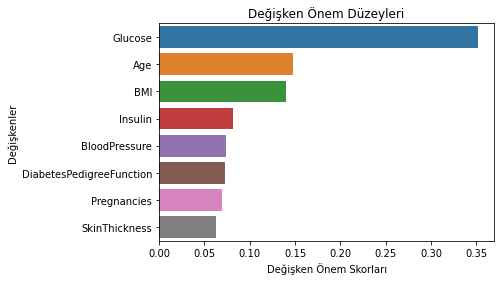

In [75]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()